cuda
Number of classes = 7 Classes: {'urban_land': [0, 255, 255], 'agriculture_land': [255, 255, 0], 'rangeland': [255, 0, 255], 'forest_land': [0, 255, 0], 'water': [0, 0, 255], 'barren_land': [255, 255, 255], 'unknown': [0, 0, 0]}


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth
100%|██████████| 161M/161M [00:01<00:00, 161MB/s]
Epoch 1/20: 100%|██████████| 161/161 [06:20<00:00,  2.36s/it, loss=1.05]


Epoch 1 - Train Loss: 1.2205, Val mIoU: 0.2731


Epoch 2/20: 100%|██████████| 161/161 [05:53<00:00,  2.20s/it, loss=0.715]


Epoch 2 - Train Loss: 0.8138, Val mIoU: 0.3447


Epoch 3/20: 100%|██████████| 161/161 [05:53<00:00,  2.20s/it, loss=0.663]


Epoch 3 - Train Loss: 0.6954, Val mIoU: 0.3194


Epoch 4/20: 100%|██████████| 161/161 [05:53<00:00,  2.19s/it, loss=0.5]


Epoch 4 - Train Loss: 0.6446, Val mIoU: 0.3822


Epoch 5/20: 100%|██████████| 161/161 [05:52<00:00,  2.19s/it, loss=0.739]


Epoch 5 - Train Loss: 0.5458, Val mIoU: 0.3506


Epoch 6/20: 100%|██████████| 161/161 [05:53<00:00,  2.19s/it, loss=0.554]


Epoch 6 - Train Loss: 0.5022, Val mIoU: 0.3961


Epoch 7/20: 100%|██████████| 161/161 [05:52<00:00,  2.19s/it, loss=0.675]


Epoch 7 - Train Loss: 0.4613, Val mIoU: 0.3836


Epoch 8/20: 100%|██████████| 161/161 [05:52<00:00,  2.19s/it, loss=0.513]


Epoch 8 - Train Loss: 0.4116, Val mIoU: 0.3974


Epoch 9/20: 100%|██████████| 161/161 [05:52<00:00,  2.19s/it, loss=0.344]


Epoch 9 - Train Loss: 0.4294, Val mIoU: 0.4099


Epoch 10/20: 100%|██████████| 161/161 [05:54<00:00,  2.20s/it, loss=0.353]


Epoch 10 - Train Loss: 0.3582, Val mIoU: 0.3864


Epoch 11/20: 100%|██████████| 161/161 [05:53<00:00,  2.20s/it, loss=0.215]


Epoch 11 - Train Loss: 0.3228, Val mIoU: 0.4227


Epoch 12/20: 100%|██████████| 161/161 [05:54<00:00,  2.20s/it, loss=0.308]


Epoch 12 - Train Loss: 0.2822, Val mIoU: 0.4303


Epoch 13/20: 100%|██████████| 161/161 [05:54<00:00,  2.20s/it, loss=0.227]


Epoch 13 - Train Loss: 0.2703, Val mIoU: 0.4115


Epoch 14/20: 100%|██████████| 161/161 [05:54<00:00,  2.20s/it, loss=0.235]


Epoch 14 - Train Loss: 0.2576, Val mIoU: 0.4207


Epoch 15/20: 100%|██████████| 161/161 [05:53<00:00,  2.20s/it, loss=1.35]


Epoch 15 - Train Loss: 0.2554, Val mIoU: 0.3966


Epoch 16/20: 100%|██████████| 161/161 [05:52<00:00,  2.19s/it, loss=0.212]


Epoch 16 - Train Loss: 0.2857, Val mIoU: 0.4198


Epoch 17/20: 100%|██████████| 161/161 [05:53<00:00,  2.20s/it, loss=0.327]


Epoch 17 - Train Loss: 0.2983, Val mIoU: 0.3985


Epoch 18/20: 100%|██████████| 161/161 [05:53<00:00,  2.20s/it, loss=1.19]


Epoch 18 - Train Loss: 0.2326, Val mIoU: 0.4185


Epoch 19/20: 100%|██████████| 161/161 [05:53<00:00,  2.19s/it, loss=0.636]


Epoch 19 - Train Loss: 0.2611, Val mIoU: 0.4216


Epoch 20/20: 100%|██████████| 161/161 [05:53<00:00,  2.19s/it, loss=0.193]


Epoch 20 - Train Loss: 0.1970, Val mIoU: 0.4349


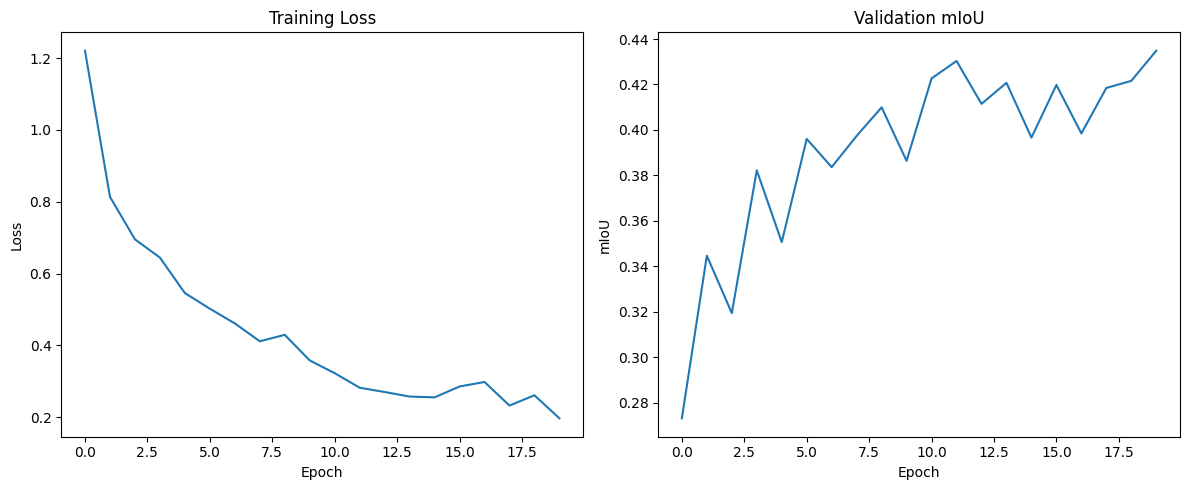

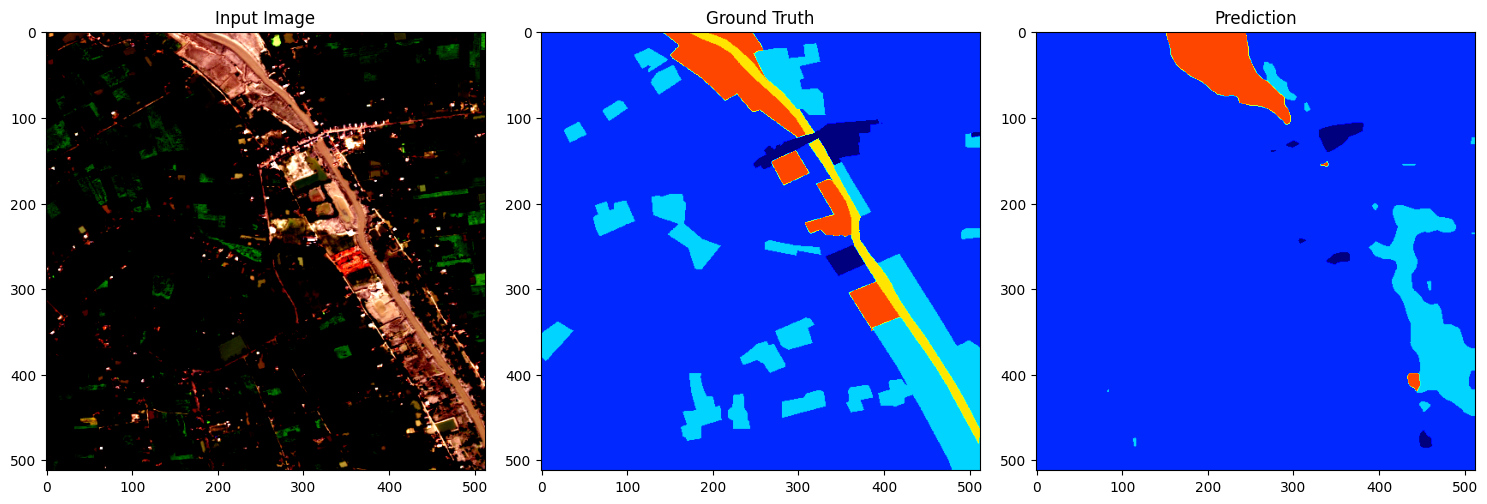

In [ ]:
import os
import copy
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
import torch.nn as nn
from PIL import Image
from pathlib import Path
from tabulate import tabulate
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision import transforms
from sklearn.metrics import jaccard_score
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.patches as mpatches
from collections import defaultdict
from torchvision.models.segmentation import deeplabv3_resnet50

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


BASE_DIR = Path("/kaggle/input/deepglobe-land-cover-classification-dataset")
CLASS_DICT_PATH = BASE_DIR / "class_dict.csv"


metadata = pd.read_csv(CLASS_DICT_PATH)
class_colors = {
    row['name']: [row['r'], row['g'], row['b']] 
    for _, row in metadata.iterrows()
}
num_classes = len(class_colors)
print(f"Number of classes = {num_classes}", f"Classes: {class_colors}")


img_transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


mask_transform = transforms.Compose([
    transforms.Resize((512, 512), interpolation=Image.NEAREST),
    transforms.PILToTensor()
])

class DeepGlobeDataset(Dataset):
    def __init__(self, img_dir, color_map, img_transform=None, mask_transform=None, 
                 point_percent=0.1):
        self.img_dir = Path(img_dir)
        self.color_map = color_map
        self.img_transform = img_transform
        self.mask_transform = mask_transform
        self.point_percent = point_percent
        self.pseudo_labels = {}  # Store pseudo-labels
        self.enable_pseudo_labels = False
        
        # Get all satellite images
        self.image_ids = [f.stem.split('_')[0] for f in self.img_dir.glob("*_sat.jpg")]
        
    def __len__(self):
        return len(self.image_ids)
    
    def _rgb_to_class(self, mask_rgb):
        h, w = mask_rgb.shape[:2]
        mask_class = np.zeros((h, w), dtype=np.uint8)
        for class_idx, color in enumerate(self.color_map.values()):
            match = np.all(mask_rgb == np.array(color), axis=-1)
            mask_class[match] = class_idx
        return mask_class
    
    def _generate_point_labels(self, mask):
        h, w = mask.shape
        point_labels = np.zeros_like(mask)
        point_mask = np.zeros_like(mask)
        num_points = int(h * w * self.point_percent)
        indices = np.random.choice(h * w, num_points, replace=False)
        rows, cols = np.unravel_index(indices, (h, w))
        point_labels[rows, cols] = mask[rows, cols]
        point_mask[rows, cols] = 1
        return point_labels, point_mask
    
    def __getitem__(self, idx):
        img_path = self.img_dir / f"{self.image_ids[idx]}_sat.jpg"
        mask_path = self.img_dir / f"{self.image_ids[idx]}_mask.png"
        
        
        image = Image.open(img_path).convert("RGB")
        if self.img_transform:
            image = self.img_transform(image)
        
        
        mask_pil = Image.open(mask_path)
        if self.mask_transform:
            mask_rgb = self.mask_transform(mask_pil).long()
        
        
        mask_class = torch.zeros(mask_rgb.shape[1:], dtype=torch.long)
        for class_idx, color in enumerate(self.color_map.values()):
            color_tensor = torch.tensor(color).view(3, 1, 1)
            matches = (mask_rgb == color_tensor).all(dim=0)
            mask_class[matches] = class_idx
        
        if self.enable_pseudo_labels and idx in self.pseudo_labels:
            point_labels, point_mask = self.pseudo_labels[idx]
        
        
        point_labels, point_mask = self._generate_point_labels(mask_class.numpy())
        
        return (
            image,  # [3, H, W]
            torch.from_numpy(point_labels),  # [H, W]
            torch.from_numpy(point_mask),  # [H, W] 
            mask_class  # [H, W]
        )

class PartialCrossEntropyLoss(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, pred, target, mask):
        ce_loss = F.cross_entropy(pred, target, reduction='none')
        masked_loss = ce_loss * mask
        return masked_loss.sum() / (mask.sum() + 1e-8)

def calculate_iou(preds, targets, num_classes):
    ious = []
    preds = torch.argmax(preds, dim=1).cpu().numpy().flatten()
    targets = targets.cpu().numpy().flatten()
    
    for class_id in range(num_classes):
        pred_inds = (preds == class_id)
        target_inds = (targets == class_id)
        intersection = np.logical_and(pred_inds, target_inds).sum()
        union = np.logical_or(pred_inds, target_inds).sum()
        iou = intersection / (union + 1e-8)
        ious.append(iou)
    
    return np.mean(ious)

def improved_visualization(dataset, idx=0):
    image, point_labels, point_mask, full_mask = dataset[idx]
    
   
    image_np = image.numpy().transpose(1, 2, 0)  # (H,W,3)
    point_labels_np = point_labels.numpy()  # (H,W)
    point_mask_np = point_mask.numpy()  # (H,W)
    full_mask_np = full_mask.numpy()  # (H,W)

    
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    

    axs[0,0].imshow(image_np)
    axs[0,0].set_title("Original Image", fontsize=12)
    

    im = axs[0,1].imshow(full_mask_np, cmap='jet', vmin=0, vmax=num_classes-1)
    axs[0,1].set_title("Full Ground Truth Mask", fontsize=12)
    
    
    patches = [mpatches.Patch(color=plt.cm.jet(i/(num_classes-1)), 
               label=f'{list(class_colors.keys())[i]}') 
              for i in range(num_classes)]
    axs[0,1].legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')
    
  
    scatter = axs[1,0].imshow(image_np)
    unique_classes = np.unique(point_labels_np[point_mask_np == 1])
    for cls in unique_classes:
        mask = (point_labels_np == cls) & (point_mask_np == 1)
        y, x = np.where(mask)
        axs[1,0].scatter(x, y, c=[plt.cm.jet(cls/(num_classes-1))], 
                        s=20, label=list(class_colors.keys())[cls], 
                        edgecolors='white', linewidths=0.3)
    axs[1,0].set_title(f"Point Labels ({point_mask_np.sum():,} pts)", fontsize=12)
    axs[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
   
    axs[1,1].imshow(full_mask_np, cmap='jet', alpha=0.4, vmin=0, vmax=num_classes-1)
    for cls in unique_classes:
        mask = (point_labels_np == cls) & (point_mask_np == 1)
        y, x = np.where(mask)
        axs[1,1].scatter(x, y, c=[plt.cm.jet(cls/(num_classes-1))], 
                        s=20, label=list(class_colors.keys())[cls],
                        edgecolors='white', linewidths=0.3)
    axs[1,1].set_title("Mask + Points Overlay", fontsize=12)
    
    plt.tight_layout()
    plt.show()


full_dataset = DeepGlobeDataset(
    img_dir=BASE_DIR/"train",
    color_map=class_colors,
    img_transform=img_transform,
    mask_transform=mask_transform,
    point_percent=0.01
)

train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4)

# Initialize model
model = deeplabv3_resnet50(pretrained=True)
model.classifier[4] = nn.Conv2d(256, num_classes, kernel_size=1)
model = model.to(device)

# Training function
def train(model, train_loader, val_loader, criterion, optimizer, epochs=10):
    train_losses = []
    val_ious = []
    
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0.0
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")
        
        for images, point_labels, point_mask, _ in progress_bar:
            images = images.to(device)
            point_labels = point_labels.to(device)
            point_mask = point_mask.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)['out']
            
            loss = criterion(outputs, point_labels, point_mask)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            progress_bar.set_postfix(loss=loss.item())
        
        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)
        
        # Validation
        model.eval()
        val_iou = 0.0
        with torch.no_grad():
            for images, _, _, true_masks in val_loader:
                images = images.to(device)
                true_masks = true_masks.to(device)
                outputs = model(images)['out']
                val_iou += calculate_iou(outputs, true_masks, num_classes)
        
        avg_val_iou = val_iou / len(val_loader)
        val_ious.append(avg_val_iou)
        
        print(f"Epoch {epoch+1} - Train Loss: {avg_loss:.4f}, Val mIoU: {avg_val_iou:.4f}")
    
    return train_losses, val_ious

# Initialize training
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = PartialCrossEntropyLoss()

# Start training
train_losses, val_ious = train(model, train_loader, val_loader, criterion, optimizer, epochs=20)

# Plot results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(val_ious)
plt.title("Validation mIoU")
plt.xlabel("Epoch")
plt.ylabel("mIoU")

plt.tight_layout()
plt.show()

# Visualize some predictions
model.eval()
with torch.no_grad():
    sample_idx = 0
    image, _, _, true_mask = val_dataset[sample_idx]
    pred = model(image.unsqueeze(0).to(device))['out']
    pred_mask = torch.argmax(pred, dim=1).cpu().squeeze()
    
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image.numpy().transpose(1, 2, 0))
    plt.title("Input Image")
    
    plt.subplot(1, 3, 2)
    plt.imshow(true_mask.numpy(), cmap='jet', vmin=0, vmax=num_classes-1)
    plt.title("Ground Truth")
    
    plt.subplot(1, 3, 3)
    plt.imshow(pred_mask.numpy(), cmap='jet', vmin=0, vmax=num_classes-1)
    plt.title("Prediction")
    
    plt.tight_layout()
    plt.show()


=== Training with 1% point density ===
Epoch 1/5 | Loss: 1.2155 | Val mIoU: 0.2777
Epoch 2/5 | Loss: 0.8822 | Val mIoU: 0.3350
Epoch 3/5 | Loss: 0.7079 | Val mIoU: 0.3516
Epoch 4/5 | Loss: 0.6132 | Val mIoU: 0.3609
Epoch 5/5 | Loss: 0.5677 | Val mIoU: 0.3580

=== Training with 5% point density ===
Epoch 1/5 | Loss: 1.1977 | Val mIoU: 0.3166
Epoch 2/5 | Loss: 0.8198 | Val mIoU: 0.3216
Epoch 3/5 | Loss: 0.6957 | Val mIoU: 0.3580
Epoch 4/5 | Loss: 0.6276 | Val mIoU: 0.3756
Epoch 5/5 | Loss: 0.5605 | Val mIoU: 0.3362

=== Training with 10% point density ===
Epoch 1/5 | Loss: 1.1855 | Val mIoU: 0.2766
Epoch 2/5 | Loss: 0.8136 | Val mIoU: 0.3185
Epoch 3/5 | Loss: 0.7361 | Val mIoU: 0.2840
Epoch 4/5 | Loss: 0.6444 | Val mIoU: 0.3448
Epoch 5/5 | Loss: 0.5860 | Val mIoU: 0.3632


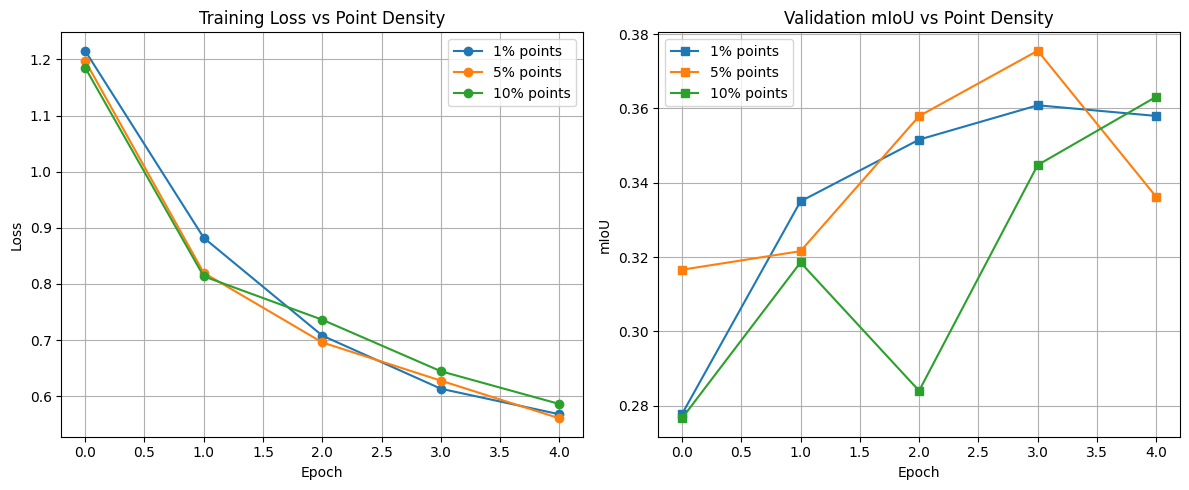


=== Experimental Results Summary ===
+-----------+-------------+--------------+---------------------+
|  Density  |  Best mIoU  |  Final Loss  |  Convergence Epoch  |
+===========+=============+==============+=====================+
|    1%     |   0.3609    |    0.5677    |          4          |
+-----------+-------------+--------------+---------------------+
|    5%     |   0.3756    |    0.5605    |          4          |
+-----------+-------------+--------------+---------------------+
|    10%    |   0.3632    |    0.586     |          5          |
+-----------+-------------+--------------+---------------------+


In [ ]:
# Experiment1: Compare different point label densities with detailed tracking


densities = [0.01, 0.05, 0.10]  
num_epochs = 5
results = defaultdict(dict)


def init_model():
    model = deeplabv3_resnet50(pretrained=True)
    model.classifier[4] = nn.Conv2d(256, num_classes, kernel_size=1)
    return model.to(device)

# Main experiment loop
for density in densities:
    print(f"\n=== Training with {density*100:.0f}% point density ===")
    
   
    train_dataset = DeepGlobeDataset(
        img_dir=BASE_DIR/"train",
        color_map=class_colors,
        img_transform=img_transform,
        mask_transform=mask_transform,
        point_percent=density
    )
    
    # Split dataset (80% train, 20% val)
    train_size = int(0.8 * len(train_dataset))
    val_size = len(train_dataset) - train_size
    train_subset, val_subset = random_split(train_dataset, [train_size, val_size])
    
    train_loader = DataLoader(train_subset, batch_size=4, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=4)
    
  
    model = init_model()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    criterion = PartialCrossEntropyLoss()
    
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0.0
        
        for images, point_labels, point_mask, _ in train_loader:
            images = images.to(device)
            point_labels = point_labels.to(device)
            point_mask = point_mask.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)['out']
            loss = criterion(outputs, point_labels, point_mask)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        
        
        model.eval()
        val_iou = 0.0
        with torch.no_grad():
            for images, _, _, true_masks in val_loader:
                images = images.to(device)
                true_masks = true_masks.to(device)
                outputs = model(images)['out']
                val_iou += calculate_iou(outputs, true_masks, num_classes)
        
        avg_val_iou = val_iou / len(val_loader)
        results[density][epoch+1] = {
            'mIoU': avg_val_iou,
            'loss': epoch_loss / len(train_loader)
        }
        print(f"Epoch {epoch+1}/{num_epochs} | Loss: {results[density][epoch+1]['loss']:.4f} | Val mIoU: {avg_val_iou:.4f}")


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for density in densities:
    losses = [results[density][e]['loss'] for e in range(1, num_epochs+1)]
    plt.plot(losses, label=f"{density*100:.0f}% points", marker='o')
plt.title("Training Loss vs Point Density")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for density in densities:
    ious = [results[density][e]['mIoU'] for e in range(1, num_epochs+1)]
    plt.plot(ious, label=f"{density*100:.0f}% points", marker='s')
plt.title("Validation mIoU vs Point Density")
plt.xlabel("Epoch")
plt.ylabel("mIoU")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


table_data = []
headers = ["Density", "Best mIoU", "Final Loss", "Convergence Epoch"]

for density in densities:
    ious = [results[density][e]['mIoU'] for e in results[density]]
    losses = [results[density][e]['loss'] for e in results[density]]
    
    best_miou = max(ious)
    final_loss = losses[-1]
    conv_epoch = ious.index(best_miou) + 1
    
    table_data.append([
        f"{density*100:.0f}%",
        f"{best_miou:.4f}",
        f"{final_loss:.4f}",
        conv_epoch
    ])

print("\n=== Experimental Results Summary ===")
print(tabulate(
    table_data,
    headers=headers,
    tablefmt="grid",
    stralign="center",
    numalign="center",
    colalign=("center", "center", "center", "center")
))

results_df = pd.DataFrame.from_dict({
    density: results[density] for density in densities
}, orient='index')
results_df.to_csv("density_experiment_results.csv")